In [1]:
from nltk.corpus import stopwords
import pandas as pd
import re, string
import pymorphy2 as pmh2
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Обзор данных

In [2]:
df = pd.read_csv('min_docs3.csv')
df

0  \
0     0   
1     0   
2     0   
3     1   
4     1   
...  ..   
1098  0   
1099  1   
1100  0   
1101  0   
1102  1   

     http://arbitrsamara.ru/dogovor-arendy/obespechitelnyy-platezh-v-dogovore-arendy/  \
0     http://inlobnya.ru/novosti/obrazovanie/vospita...                                 
1     http://marslanov.com/otzyvy/audit-kompanii-22-...                                 
2     http://mail.mycompany.su/RU/dinskaya/company/m...                                 
3            https://ok.ru/ksfirst/topic/70000727225755                                 
4                   https://instagram.com/p/CJajZwOlEt3                                 
...                                                 ...                                 
1098                   http://citylife-spb.ulcraft.com/                                 
1099    https://ok.ru/avtolombards/topic/69818751358246                                 
1100           http://etprf.ru/NotificationEX/id/109593                                 
1101        http://customsforum.ru/citizens/auto-parts/                                 
1102                   https://sl24leasing.ru/news/446/                                 

     В связи с, как правило, высокой стоимостью имущества, передаваемого на длительный срок во временное владение и пользование арендатору, условие об обеспечительном платеже в договор аренды включается достаточно часто.  
0     Ее суть в том, что Правительство берет на себя...                                                                                                                                                                       
1     затем мне потребовалось снять более крупную су...                                                                                                                                                                       
2     О каждой из 1103 фирм рубрики Услуги микрофина...                                                                                                                                                                       
3                         Минимальный пакет документов.                                                                                                                                                                       
4      Обращаться можно с 18 лет, нужен только паспорт.                                                                                                                                                                       
...                                                 ...                                                                                                                                                                       
1098       Наша фирма - лидер на рынке в своей области!                                                                                                                                                                       
1099  Для получения займа клиент должен предоставить...                                                                                                                                                                       
1100  "Поставка оборудования эквайринга с предоставл...                                                                                                                                                                       
1101  В случае непредставления соответствующих докум...                                                                                                                                                                       
1102  Особенности продуктового предложения Попади в ...                                                                                                                                                                       

[1103 rows x 3 columns]

In [3]:
df.loc[-1] = ['0','http://arbitrsamara.ru/dogovor-arendy/obespechitelnyy-platezh-v-dogovore-arendy/', 'В связи с, как правило, высокой стоимостью имущества, передаваемого на длительный срок во временное владение и пользование арендатору, условие об обеспечительном платеже в договор аренды включается достаточно часто.']
df.index = df.index + 1  
df = df.sort_index() 

In [4]:
df

0  \
0     0   
1     0   
2     0   
3     0   
4     1   
...  ..   
1099  0   
1100  1   
1101  0   
1102  0   
1103  1   

     http://arbitrsamara.ru/dogovor-arendy/obespechitelnyy-platezh-v-dogovore-arendy/  \
0     http://arbitrsamara.ru/dogovor-arendy/obespech...                                 
1     http://inlobnya.ru/novosti/obrazovanie/vospita...                                 
2     http://marslanov.com/otzyvy/audit-kompanii-22-...                                 
3     http://mail.mycompany.su/RU/dinskaya/company/m...                                 
4            https://ok.ru/ksfirst/topic/70000727225755                                 
...                                                 ...                                 
1099                   http://citylife-spb.ulcraft.com/                                 
1100    https://ok.ru/avtolombards/topic/69818751358246                                 
1101           http://etprf.ru/NotificationEX/id/109593                                 
1102        http://customsforum.ru/citizens/auto-parts/                                 
1103                   https://sl24leasing.ru/news/446/                                 

     В связи с, как правило, высокой стоимостью имущества, передаваемого на длительный срок во временное владение и пользование арендатору, условие об обеспечительном платеже в договор аренды включается достаточно часто.  
0     В связи с, как правило, высокой стоимостью иму...                                                                                                                                                                       
1     Ее суть в том, что Правительство берет на себя...                                                                                                                                                                       
2     затем мне потребовалось снять более крупную су...                                                                                                                                                                       
3     О каждой из 1103 фирм рубрики Услуги микрофина...                                                                                                                                                                       
4                         Минимальный пакет документов.                                                                                                                                                                       
...                                                 ...                                                                                                                                                                       
1099       Наша фирма - лидер на рынке в своей области!                                                                                                                                                                       
1100  Для получения займа клиент должен предоставить...                                                                                                                                                                       
1101  "Поставка оборудования эквайринга с предоставл...                                                                                                                                                                       
1102  В случае непредставления соответствующих докум...                                                                                                                                                                       
1103  Особенности продуктового предложения Попади в ...                                                                                                                                                                       

[1104 rows x 3 columns]

In [5]:
df = df.rename(columns={"0": "label", 
                   "http://arbitrsamara.ru/dogovor-arendy/obespechitelnyy-platezh-v-dogovore-arendy/": "url",
                  "В связи с, как правило, высокой стоимостью имущества, передаваемого на длительный срок во временное владение и пользование арендатору, условие об обеспечительном платеже в договор аренды включается достаточно часто.": "text"})

In [6]:
df

label                                                url  \
0        0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1        0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2        0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3        0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4        1         https://ok.ru/ksfirst/topic/70000727225755   
...    ...                                                ...   
1099     0                   http://citylife-spb.ulcraft.com/   
1100     1    https://ok.ru/avtolombards/topic/69818751358246   
1101     0           http://etprf.ru/NotificationEX/id/109593   
1102     0        http://customsforum.ru/citizens/auto-parts/   
1103     1                   https://sl24leasing.ru/news/446/   

                                                   text  
0     В связи с, как правило, высокой стоимостью иму...  
1     Ее суть в том, что Правительство берет на себя...  
2     затем мне потребовалось снять более крупную су...  
3     О каждой из 1103 фирм рубрики Услуги микрофина...  
4                         Минимальный пакет документов.  
...                                                 ...  
1099       Наша фирма - лидер на рынке в своей области!  
1100  Для получения займа клиент должен предоставить...  
1101  "Поставка оборудования эквайринга с предоставл...  
1102  В случае непредставления соответствующих докум...  
1103  Особенности продуктового предложения Попади в ...  

[1104 rows x 3 columns]

In [7]:
df.text[5]

'Обращаться можно с 18 лет, нужен только паспорт.'

In [10]:
df.text[12]

'7 версия не сопровождается и не развивается с конца 2016 года, вы можете использовать только 2 способа Паспорт и фотография.'

In [7]:
isempty = df.empty
print('Is the DataFrame empty :', isempty)

Is the DataFrame empty : False


In [8]:
np.where(pd.isnull(df)) 
#Пустых значений нет

(array([], dtype=int64), array([], dtype=int64))

In [9]:
df.drop_duplicates()

label                                                url  \
0        0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1        0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2        0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3        0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4        1         https://ok.ru/ksfirst/topic/70000727225755   
...    ...                                                ...   
1099     0                   http://citylife-spb.ulcraft.com/   
1100     1    https://ok.ru/avtolombards/topic/69818751358246   
1101     0           http://etprf.ru/NotificationEX/id/109593   
1102     0        http://customsforum.ru/citizens/auto-parts/   
1103     1                   https://sl24leasing.ru/news/446/   

                                                   text  
0     В связи с, как правило, высокой стоимостью иму...  
1     Ее суть в том, что Правительство берет на себя...  
2     затем мне потребовалось снять более крупную су...  
3     О каждой из 1103 фирм рубрики Услуги микрофина...  
4                         Минимальный пакет документов.  
...                                                 ...  
1099       Наша фирма - лидер на рынке в своей области!  
1100  Для получения займа клиент должен предоставить...  
1101  "Поставка оборудования эквайринга с предоставл...  
1102  В случае непредставления соответствующих докум...  
1103  Особенности продуктового предложения Попади в ...  

[1104 rows x 3 columns]

In [10]:
df.dtypes

label    object
url      object
text     object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1103
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1104 non-null   object
 1   url     1104 non-null   object
 2   text    1104 non-null   object
dtypes: object(3)
memory usage: 34.5+ KB


In [12]:
df["label"] = pd.to_numeric(df["label"])
df['text'] = df['text'].astype('string')
df['url'] = df['url'].astype('string')

In [13]:
df.dtypes

label     int64
url      string
text     string
dtype: object

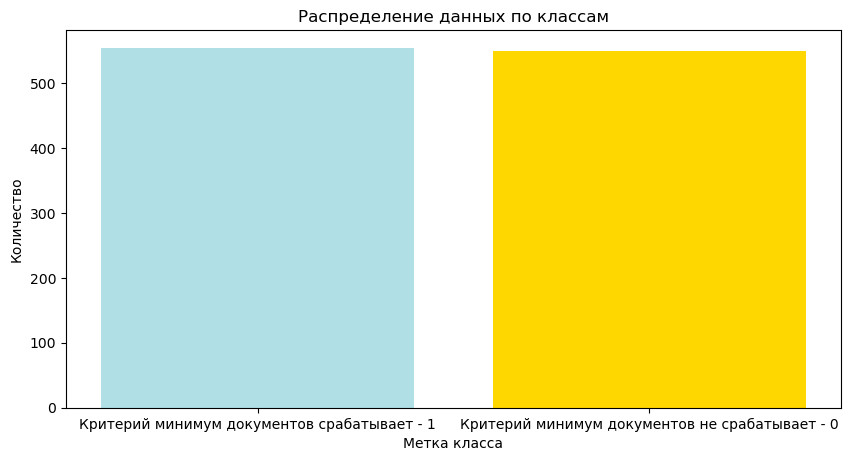

In [14]:
fig = plt.figure(figsize=(10,5),dpi=100)
labels = ['Критерий минимум документов срабатывает - 1', 'Критерий минимум документов не срабатывает - 0']
plt.bar(x= labels,height= df['label'].value_counts(), color=['powderblue','gold'])
plt.ylabel('Количество')
plt.xlabel('Метка класса')
plt.title('Распределение данных по классам')
plt.savefig('Распределение данных по классам.png');
#данные сбалансированы

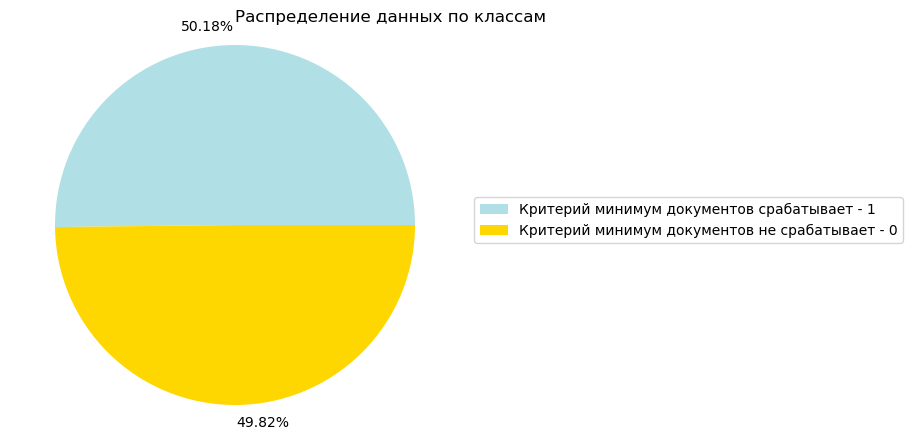

In [15]:
fig = plt.figure(figsize=(10,5),dpi=100)
title = plt.title('Распределение данных по классам')
title.set_ha("left")
plt.gca().axis("equal")
labels = [str(i)+"%" for i in np.round(df['label'].value_counts()*100/df.shape[0], 2)]
pie = plt.pie(x = df['label'].value_counts(), labels = labels, colors=['powderblue','gold'])
legend = ['Критерий минимум документов срабатывает - 1', 'Критерий минимум документов не срабатывает - 0']
plt.legend(pie[0],legend, bbox_to_anchor=(0.9,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.savefig('Распределение данных по классам - круговая диаграмма.png');

In [16]:
df['len in symbols'] = df['text'].str.len()
df

label                                                url  \
0         0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1         0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2         0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3         0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4         1         https://ok.ru/ksfirst/topic/70000727225755   
...     ...                                                ...   
1099      0                   http://citylife-spb.ulcraft.com/   
1100      1    https://ok.ru/avtolombards/topic/69818751358246   
1101      0           http://etprf.ru/NotificationEX/id/109593   
1102      0        http://customsforum.ru/citizens/auto-parts/   
1103      1                   https://sl24leasing.ru/news/446/   

                                                   text  len in symbols  
0     В связи с, как правило, высокой стоимостью иму...             215  
1     Ее суть в том, что Правительство берет на себя...             181  
2     затем мне потребовалось снять более крупную су...             329  
3     О каждой из 1103 фирм рубрики Услуги микрофина...             128  
4                         Минимальный пакет документов.              29  
...                                                 ...             ...  
1099       Наша фирма - лидер на рынке в своей области!              44  
1100  Для получения займа клиент должен предоставить...             147  
1101  "Поставка оборудования эквайринга с предоставл...             555  
1102  В случае непредставления соответствующих докум...             342  
1103  Особенности продуктового предложения Попади в ...             157  

[1104 rows x 4 columns]

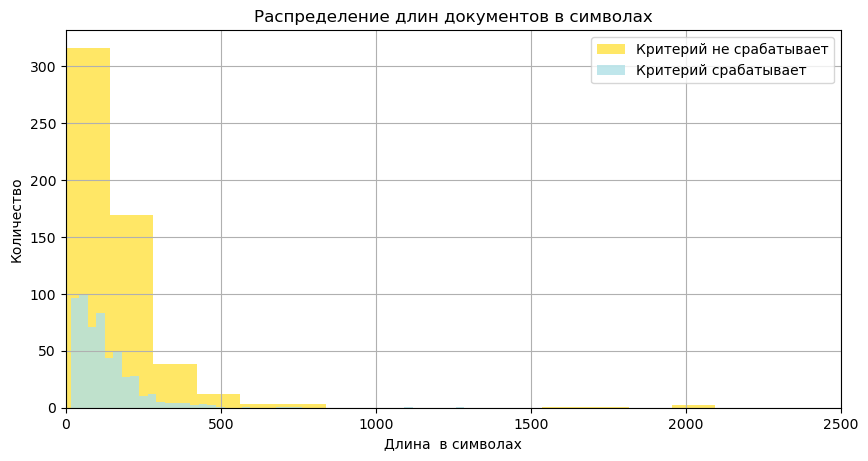

<Figure size 432x288 with 0 Axes>

In [17]:
fig = plt.figure(figsize=(10,5),dpi=100)
bins = 150
plt.title('Распределение длин документов в символах')
plt.hist(df[df['label'] == 0]['len in symbols'], alpha = 0.6, bins=bins, label='Критерий не срабатывает', color='gold')
plt.hist(df[df['label'] == 1]['len in symbols'], alpha = 0.8, bins=bins, label='Критерий срабатывает', color='powderblue')
plt.xlabel('Длина  в символах')
plt.ylabel('Количество')
plt.legend(loc='upper right')
plt.xlim(0,2500)
plt.grid()
plt.show();
plt.savefig('Распределение длины предложений в символах.png')

In [18]:
df['len in words'] = df['text'].str.split().map(lambda x: len(x))
df

label                                                url  \
0         0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1         0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2         0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3         0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4         1         https://ok.ru/ksfirst/topic/70000727225755   
...     ...                                                ...   
1099      0                   http://citylife-spb.ulcraft.com/   
1100      1    https://ok.ru/avtolombards/topic/69818751358246   
1101      0           http://etprf.ru/NotificationEX/id/109593   
1102      0        http://customsforum.ru/citizens/auto-parts/   
1103      1                   https://sl24leasing.ru/news/446/   

                                                   text  len in symbols  \
0     В связи с, как правило, высокой стоимостью иму...             215   
1     Ее суть в том, что Правительство берет на себя...             181   
2     затем мне потребовалось снять более крупную су...             329   
3     О каждой из 1103 фирм рубрики Услуги микрофина...             128   
4                         Минимальный пакет документов.              29   
...                                                 ...             ...   
1099       Наша фирма - лидер на рынке в своей области!              44   
1100  Для получения займа клиент должен предоставить...             147   
1101  "Поставка оборудования эквайринга с предоставл...             555   
1102  В случае непредставления соответствующих докум...             342   
1103  Особенности продуктового предложения Попади в ...             157   

      len in words  
0               28  
1               26  
2               49  
3               18  
4                3  
...            ...  
1099             9  
1100            17  
1101            63  
1102            34  
1103            18  

[1104 rows x 5 columns]

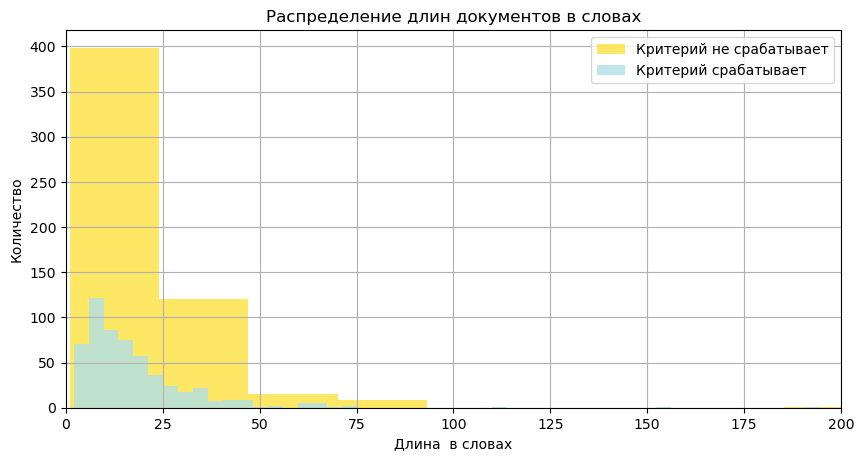

<Figure size 432x288 with 0 Axes>

In [19]:
fig = plt.figure(figsize=(10,5),dpi=100)
bins = 150
plt.title('Распределение длин документов в словах')
plt.hist(df[df['label'] == 0]['len in words'], alpha = 0.6, bins=bins, label='Критерий не срабатывает', color='gold')
plt.hist(df[df['label'] == 1]['len in words'], alpha = 0.8, bins=bins, label='Критерий срабатывает', color='powderblue')
plt.xlabel('Длина  в словах')
plt.ylabel('Количество')
plt.legend(loc='upper right')
plt.xlim(0,200)
plt.grid()
plt.show();
plt.savefig('Распределение длины предложений в словах.png')

In [20]:
import seaborn as sns

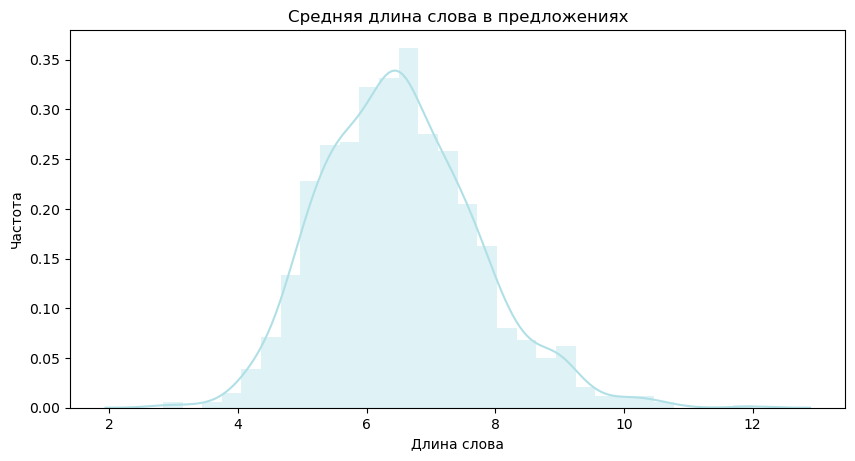

In [21]:
word=df['text'].str.split().apply(lambda x : [len(i) for i in x])

fig = plt.figure(figsize=(10,5),dpi=100)
sns.distplot(word.map(lambda x: np.mean(x)), color='powderblue')

plt.xlabel('Длина слова')
plt.ylabel('Частота')
plt.title('Средняя длина слова в предложениях')
plt.savefig('Средняя длина слова в предложениях общее.png');

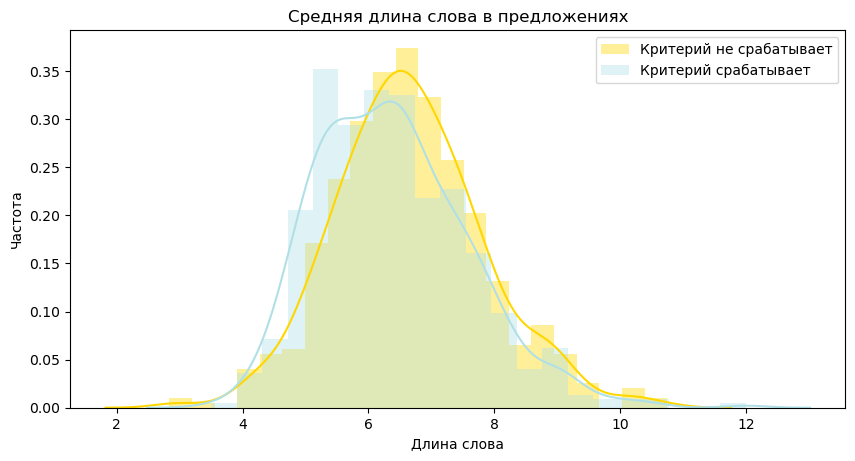

In [22]:
word0=df[df['label'] == 0]['text'].str.split().apply(lambda x : [len(i) for i in x])
word1=df[df['label'] == 1]['text'].str.split().apply(lambda x : [len(i) for i in x])

fig = plt.figure(figsize=(10,5),dpi=100)
sns.distplot(word0.map(lambda x: np.mean(x)), color='gold', label='Критерий не срабатывает')
sns.distplot(word1.map(lambda x: np.mean(x)), color='powderblue', label='Критерий срабатывает') 

plt.xlabel('Длина слова')
plt.ylabel('Частота')
plt.legend()
plt.title('Средняя длина слова в предложениях')
plt.savefig('Средняя длина слова в предложениях.png');

In [23]:
df.to_csv('final_min_docs.csv')

In [24]:
words = [df['text'][i].split()for i in range(len(df['text']))]
full_words =[item for sublist in words for item in sublist]
full_words

['В',
 'связи',
 'с,',
 'как',
 'правило,',
 'высокой',
 'стоимостью',
 'имущества,',
 'передаваемого',
 'на',
 'длительный',
 'срок',
 'во',
 'временное',
 'владение',
 'и',
 'пользование',
 'арендатору,',
 'условие',
 'об',
 'обеспечительном',
 'платеже',
 'в',
 'договор',
 'аренды',
 'включается',
 'достаточно',
 'часто.',
 'Ее',
 'суть',
 'в',
 'том,',
 'что',
 'Правительство',
 'берет',
 'на',
 'себя',
 'обязанности',
 'выплачивать',
 'всю',
 'стоимость',
 'квартиры:',
 'первоначальный',
 'взнос',
 'и',
 'тело',
 'кредита,',
 'а',
 'ее',
 'участникам',
 'остается',
 'платить',
 'только',
 'проценты.',
 'затем',
 'мне',
 'потребовалось',
 'снять',
 'более',
 'крупную',
 'сумму',
 '-2000$',
 'и',
 'тут',
 'началось,',
 'просадка,',
 'система',
 'не',
 'позволяет',
 'и',
 'т.д.',
 'из',
 'просадки',
 'вышли,',
 'рассылка',
 'всем',
 'по',
 'почте',
 'миновали',
 'кризис,',
 'и',
 'просьба',
 'в',
 'августе',
 'месяце',
 'не',
 'выводить',
 'средства,',
 'в',
 'силу',
 'того,',
 'что'

In [25]:
from nltk.probability import FreqDist
fdist = FreqDist(full_words)
fdist

FreqDist({'и': 1072, 'в': 766, 'на': 600, 'не': 311, 'только': 305, 'с': 297, 'это': 260, 'по': 253, 'что': 244, 'для': 229, ...})

In [26]:
fdist.most_common(10)

[('и', 1072),
 ('в', 766),
 ('на', 600),
 ('не', 311),
 ('только', 305),
 ('с', 297),
 ('это', 260),
 ('по', 253),
 ('что', 244),
 ('для', 229)]

In [27]:
fdist = pd.Series(dict(fdist.most_common(30)))

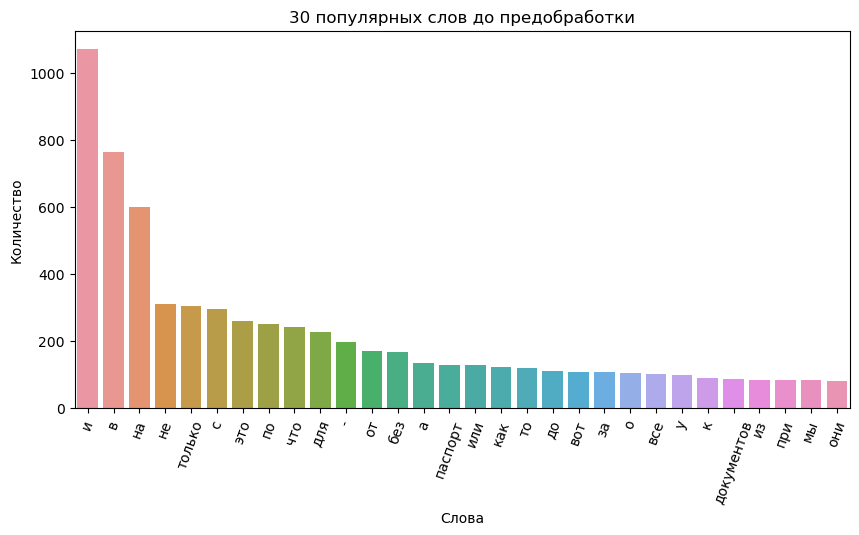

In [28]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
plt.xticks(rotation=70);
plt.xlabel('Слова')
plt.ylabel('Количество')
plt.title('30 популярных слов до предобработки')
fig.savefig('Популярные слова до предобработки.png');

## Предобработка текстовых данных

1. Удаление стоп-слов и пунктуации 
2. Приведение к нижнему регистру 
3. Токенизация
4. Лемматизация


In [29]:
df = pd.read_csv('final_min_docs.csv')

In [30]:
russian_stopwords = stopwords.words("russian")# собираем стоп-слова
russian_stopwords.append('который')
russian_stopwords.append('свой')
regex = re.compile('[%s]' % re.escape(string.punctuation)) # компилим regexp выражение
morph = pmh2.MorphAnalyzer() #для лемматизации

In [31]:
def preprocessing(text):
    text = regex.sub('', text) # удаляем пунктуацию
    text = [token.lower() for token in text.split() if token.lower() not in russian_stopwords] # Удаляем стоп-слова 
                                                                                       # приводим к нижнему решистру 
    text = [token for token in text if not token.isdigit()] #удаляем цифры
    text = [token for token in text if token] # Удаляем пустые токены
    return ' '.join(text)

In [32]:
texts = df['text'].apply(lambda text: preprocessing(text))
texts

0       связи правило высокой стоимостью имущества пер...
1       суть правительство берет обязанности выплачива...
2       затем потребовалось снять крупную сумму начало...
3       каждой фирм рубрики услуги микрофинансирования...
4                            минимальный пакет документов
                              ...                        
1099                 наша фирма лидер рынке своей области
1100    получения займа клиент должен предоставить мин...
1101    поставка оборудования эквайринга предоставлени...
1102    случае непредставления соответствующих докумен...
1103    особенности продуктового предложения попади де...
Name: text, Length: 1104, dtype: object

In [33]:
pos_for_remove = ['PRCL', 'PREP', 'CONJ', 'INTJ', None]

In [34]:
def preprocessing2(texts):
    clean_texts = [text.split() for text in texts]
    clean_texts = [[morph.parse(word)[0].normal_form for word in text] for text in clean_texts]
    clean_texts = [[word for word in text if morph.parse(word)[0].tag.POS not in pos_for_remove] 
                   for text in clean_texts]
    return clean_texts

In [35]:
clean_texts = preprocessing2(texts)
clean_texts

[['связь',
  'правило',
  'высокий',
  'стоимость',
  'имущество',
  'передаваемый',
  'длительный',
  'срок',
  'временной',
  'владение',
  'пользование',
  'арендатор',
  'условие',
  'обеспечительный',
  'платёж',
  'договор',
  'аренда',
  'включаться',
  'достаточно',
  'часто'],
 ['быть',
  'правительство',
  'брать',
  'обязанность',
  'выплачивать',
  'стоимость',
  'квартира',
  'первоначальный',
  'взнос',
  'тело',
  'кредит',
  'участник',
  'оставаться',
  'платить',
  'процент'],
 ['затем',
  'потребоваться',
  'снять',
  'крупный',
  'сумма',
  'начаться',
  'просадка',
  'система',
  'позволять',
  'просадка',
  'выйти',
  'рассылка',
  'весь',
  'почта',
  'миновать',
  'кризис',
  'просьба',
  'август',
  'месяц',
  'выводить',
  'средство',
  'сила',
  'банкипартнёр',
  'поддерживать',
  'средство',
  'инвестор',
  'пострадать',
  'нужно',
  'время',
  'заработать'],
 ['каждый',
  'фирма',
  'рубрика',
  'услуга',
  'микрофинансирование',
  'получить',
  'подробный'

In [36]:
words = []
for text in clean_texts:
    for i in text:
        words.append(i)
words

['связь',
 'правило',
 'высокий',
 'стоимость',
 'имущество',
 'передаваемый',
 'длительный',
 'срок',
 'временной',
 'владение',
 'пользование',
 'арендатор',
 'условие',
 'обеспечительный',
 'платёж',
 'договор',
 'аренда',
 'включаться',
 'достаточно',
 'часто',
 'быть',
 'правительство',
 'брать',
 'обязанность',
 'выплачивать',
 'стоимость',
 'квартира',
 'первоначальный',
 'взнос',
 'тело',
 'кредит',
 'участник',
 'оставаться',
 'платить',
 'процент',
 'затем',
 'потребоваться',
 'снять',
 'крупный',
 'сумма',
 'начаться',
 'просадка',
 'система',
 'позволять',
 'просадка',
 'выйти',
 'рассылка',
 'весь',
 'почта',
 'миновать',
 'кризис',
 'просьба',
 'август',
 'месяц',
 'выводить',
 'средство',
 'сила',
 'банкипартнёр',
 'поддерживать',
 'средство',
 'инвестор',
 'пострадать',
 'нужно',
 'время',
 'заработать',
 'каждый',
 'фирма',
 'рубрика',
 'услуга',
 'микрофинансирование',
 'получить',
 'подробный',
 'контакт',
 'адрес',
 'красный',
 'телефон',
 'минимальный',
 'пакет',
 

In [37]:
def get_ngrams(text, n ):
    n_grams = ngrams(text, n)
    lst = ['_'.join(grams) for grams in n_grams]
    return ' '.join(word for word in lst)

In [38]:
bigrams=[]
for i,text in enumerate(clean_texts):
    bi = get_ngrams(text, 2)
    bigrams.append(bi)
bigrams

['связь_правило правило_высокий высокий_стоимость стоимость_имущество имущество_передаваемый передаваемый_длительный длительный_срок срок_временной временной_владение владение_пользование пользование_арендатор арендатор_условие условие_обеспечительный обеспечительный_платёж платёж_договор договор_аренда аренда_включаться включаться_достаточно достаточно_часто',
 'быть_правительство правительство_брать брать_обязанность обязанность_выплачивать выплачивать_стоимость стоимость_квартира квартира_первоначальный первоначальный_взнос взнос_тело тело_кредит кредит_участник участник_оставаться оставаться_платить платить_процент',
 'затем_потребоваться потребоваться_снять снять_крупный крупный_сумма сумма_начаться начаться_просадка просадка_система система_позволять позволять_просадка просадка_выйти выйти_рассылка рассылка_весь весь_почта почта_миновать миновать_кризис кризис_просьба просьба_август август_месяц месяц_выводить выводить_средство средство_сила сила_банкипартнёр банкипартнёр_поддерж

### Частотный анализ после предобработки

In [40]:
bigr = [bigrams[i].split()for i in range(len(bigrams))]
full_bigr =[item for sublist in bigr for item in sublist]
full_bigr

['связь_правило',
 'правило_высокий',
 'высокий_стоимость',
 'стоимость_имущество',
 'имущество_передаваемый',
 'передаваемый_длительный',
 'длительный_срок',
 'срок_временной',
 'временной_владение',
 'владение_пользование',
 'пользование_арендатор',
 'арендатор_условие',
 'условие_обеспечительный',
 'обеспечительный_платёж',
 'платёж_договор',
 'договор_аренда',
 'аренда_включаться',
 'включаться_достаточно',
 'достаточно_часто',
 'быть_правительство',
 'правительство_брать',
 'брать_обязанность',
 'обязанность_выплачивать',
 'выплачивать_стоимость',
 'стоимость_квартира',
 'квартира_первоначальный',
 'первоначальный_взнос',
 'взнос_тело',
 'тело_кредит',
 'кредит_участник',
 'участник_оставаться',
 'оставаться_платить',
 'платить_процент',
 'затем_потребоваться',
 'потребоваться_снять',
 'снять_крупный',
 'крупный_сумма',
 'сумма_начаться',
 'начаться_просадка',
 'просадка_система',
 'система_позволять',
 'позволять_просадка',
 'просадка_выйти',
 'выйти_рассылка',
 'рассылка_весь',


In [41]:
bi_fdist = FreqDist(full_bigr)
bi_fdist = pd.Series(dict(bi_fdist.most_common(30)))

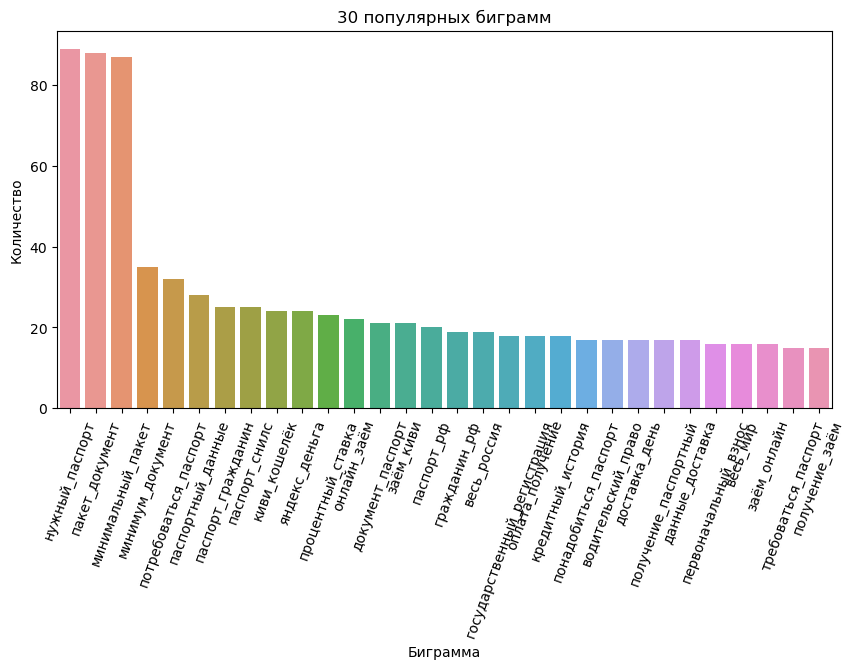

In [42]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
all_plot = sns.barplot(x=bi_fdist.index, y=bi_fdist.values, ax=ax)
plt.xticks(rotation=70);
plt.xlabel('Биграмма')
plt.ylabel('Количество')
plt.title('30 популярных биграмм')
fig.savefig('Популярные биграммы .png');

In [39]:
clean_texts = [[' '.join(i)] for i in clean_texts]
clean_texts

[['связь правило высокий стоимость имущество передаваемый длительный срок временной владение пользование арендатор условие обеспечительный платёж договор аренда включаться достаточно часто'],
 ['быть правительство брать обязанность выплачивать стоимость квартира первоначальный взнос тело кредит участник оставаться платить процент'],
 ['затем потребоваться снять крупный сумма начаться просадка система позволять просадка выйти рассылка весь почта миновать кризис просьба август месяц выводить средство сила банкипартнёр поддерживать средство инвестор пострадать нужно время заработать'],
 ['каждый фирма рубрика услуга микрофинансирование получить подробный контакт адрес красный телефон'],
 ['минимальный пакет документ'],
 ['обращаться год нужный паспорт'],
 ['территориальный избирательный комиссия город салехард доводить сведение кандидат представитель средство массовый информация организация индивидуальный предприниматель оказывать услуга проведение предвыборный агитация период подготовка 

In [47]:
clean_texts  = [s[0] for s in clean_texts]
df['clean texts'] = clean_texts
df

Unnamed: 0  label                                                url  \
0              0      0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1              1      0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2              2      0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3              3      0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4              4      1         https://ok.ru/ksfirst/topic/70000727225755   
...          ...    ...                                                ...   
1099        1099      0                   http://citylife-spb.ulcraft.com/   
1100        1100      1    https://ok.ru/avtolombards/topic/69818751358246   
1101        1101      0           http://etprf.ru/NotificationEX/id/109593   
1102        1102      0        http://customsforum.ru/citizens/auto-parts/   
1103        1103      1                   https://sl24leasing.ru/news/446/   

                                                   text  len in symbols  \
0     В связи с, как правило, высокой стоимостью иму...             215   
1     Ее суть в том, что Правительство берет на себя...             181   
2     затем мне потребовалось снять более крупную су...             329   
3     О каждой из 1103 фирм рубрики Услуги микрофина...             128   
4                         Минимальный пакет документов.              29   
...                                                 ...             ...   
1099       Наша фирма - лидер на рынке в своей области!              44   
1100  Для получения займа клиент должен предоставить...             147   
1101  "Поставка оборудования эквайринга с предоставл...             555   
1102  В случае непредставления соответствующих докум...             342   
1103  Особенности продуктового предложения Попади в ...             157   

      len in words                                        clean texts  
0               28  связь правило высокий стоимость имущество пере...  
1               26  быть правительство брать обязанность выплачива...  
2               49  затем потребоваться снять крупный сумма начать...  
3               18  каждый фирма рубрика услуга микрофинансировани...  
4                3                         минимальный пакет документ  
...            ...                                                ...  
1099             9                 наш фирма лидер рынок свой область  
1100            17  получение заём клиент должный предоставить мин...  
1101            63  поставка оборудование эквайринг предоставление...  
1102            34  случай непредставление соответствующий докумен...  
1103            18  особенность продуктовый предложение попасть де...  

[1104 rows x 7 columns]

In [49]:
df['len in symbols after preproc'] = df['clean texts'].str.len()
df

Unnamed: 0  label                                                url  \
0              0      0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1              1      0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2              2      0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3              3      0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4              4      1         https://ok.ru/ksfirst/topic/70000727225755   
...          ...    ...                                                ...   
1099        1099      0                   http://citylife-spb.ulcraft.com/   
1100        1100      1    https://ok.ru/avtolombards/topic/69818751358246   
1101        1101      0           http://etprf.ru/NotificationEX/id/109593   
1102        1102      0        http://customsforum.ru/citizens/auto-parts/   
1103        1103      1                   https://sl24leasing.ru/news/446/   

                                                   text  len in symbols  \
0     В связи с, как правило, высокой стоимостью иму...             215   
1     Ее суть в том, что Правительство берет на себя...             181   
2     затем мне потребовалось снять более крупную су...             329   
3     О каждой из 1103 фирм рубрики Услуги микрофина...             128   
4                         Минимальный пакет документов.              29   
...                                                 ...             ...   
1099       Наша фирма - лидер на рынке в своей области!              44   
1100  Для получения займа клиент должен предоставить...             147   
1101  "Поставка оборудования эквайринга с предоставл...             555   
1102  В случае непредставления соответствующих докум...             342   
1103  Особенности продуктового предложения Попади в ...             157   

      len in words                                        clean texts  \
0               28  связь правило высокий стоимость имущество пере...   
1               26  быть правительство брать обязанность выплачива...   
2               49  затем потребоваться снять крупный сумма начать...   
3               18  каждый фирма рубрика услуга микрофинансировани...   
4                3                         минимальный пакет документ   
...            ...                                                ...   
1099             9                 наш фирма лидер рынок свой область   
1100            17  получение заём клиент должный предоставить мин...   
1101            63  поставка оборудование эквайринг предоставление...   
1102            34  случай непредставление соответствующий докумен...   
1103            18  особенность продуктовый предложение попасть де...   

      len in symbols after preproc  
0                              185  
1                              136  
2                              248  
3                               96  
4                               26  
...                            ...  
1099                            34  
1100                           122  
1101                           485  
1102                           308  
1103                           144  

[1104 rows x 8 columns]

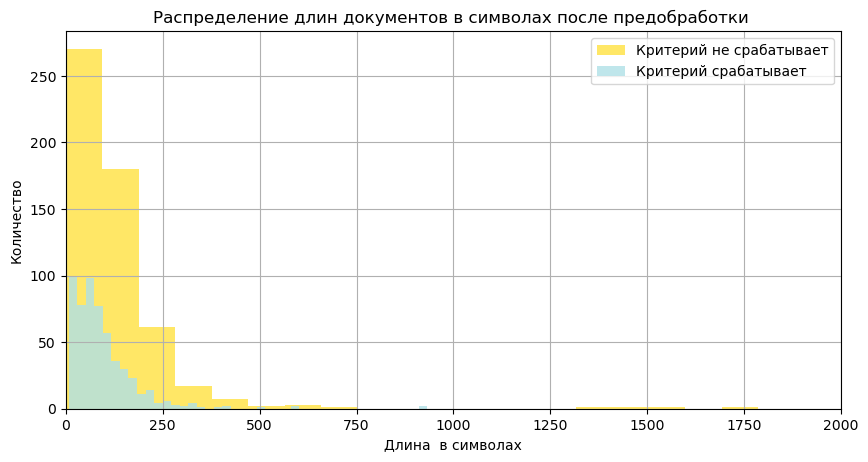

<Figure size 432x288 with 0 Axes>

In [51]:
fig = plt.figure(figsize=(10,5),dpi=100)
bins = 150
plt.title('Распределение длин документов в символах после предобработки ')
plt.hist(df[df['label'] == 0]['len in symbols after preproc'], alpha = 0.6, bins=bins, label='Критерий не срабатывает', color='gold')
plt.hist(df[df['label'] == 1]['len in symbols after preproc'], alpha = 0.8, bins=bins, label='Критерий срабатывает', color='powderblue')
plt.xlabel('Длина  в символах')
plt.ylabel('Количество')
plt.legend(loc='upper right')
plt.xlim(0,2000)
plt.grid()
plt.show();
plt.savefig('Распределение длины документов в символах после предобработки.png')

In [52]:
df['len in words after preproc'] = df['clean texts'].str.split().map(lambda x: len(x))
df

Unnamed: 0  label                                                url  \
0              0      0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1              1      0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2              2      0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3              3      0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4              4      1         https://ok.ru/ksfirst/topic/70000727225755   
...          ...    ...                                                ...   
1099        1099      0                   http://citylife-spb.ulcraft.com/   
1100        1100      1    https://ok.ru/avtolombards/topic/69818751358246   
1101        1101      0           http://etprf.ru/NotificationEX/id/109593   
1102        1102      0        http://customsforum.ru/citizens/auto-parts/   
1103        1103      1                   https://sl24leasing.ru/news/446/   

                                                   text  len in symbols  \
0     В связи с, как правило, высокой стоимостью иму...             215   
1     Ее суть в том, что Правительство берет на себя...             181   
2     затем мне потребовалось снять более крупную су...             329   
3     О каждой из 1103 фирм рубрики Услуги микрофина...             128   
4                         Минимальный пакет документов.              29   
...                                                 ...             ...   
1099       Наша фирма - лидер на рынке в своей области!              44   
1100  Для получения займа клиент должен предоставить...             147   
1101  "Поставка оборудования эквайринга с предоставл...             555   
1102  В случае непредставления соответствующих докум...             342   
1103  Особенности продуктового предложения Попади в ...             157   

      len in words                                        clean texts  \
0               28  связь правило высокий стоимость имущество пере...   
1               26  быть правительство брать обязанность выплачива...   
2               49  затем потребоваться снять крупный сумма начать...   
3               18  каждый фирма рубрика услуга микрофинансировани...   
4                3                         минимальный пакет документ   
...            ...                                                ...   
1099             9                 наш фирма лидер рынок свой область   
1100            17  получение заём клиент должный предоставить мин...   
1101            63  поставка оборудование эквайринг предоставление...   
1102            34  случай непредставление соответствующий докумен...   
1103            18  особенность продуктовый предложение попасть де...   

      len in symbols after preproc  len in words after preproc  
0                              185                          20  
1                              136                          15  
2                              248                          30  
3                               96                          11  
4                               26                           3  
...                            ...                         ...  
1099                            34                           6  
1100                           122                          14  
1101                           485                          48  
1102                           308                          28  
1103                           144                          15  

[1104 rows x 9 columns]

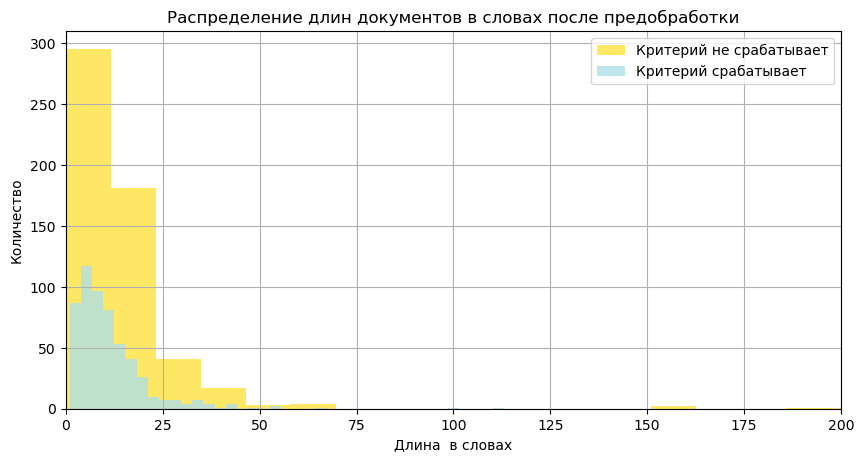

<Figure size 432x288 with 0 Axes>

In [53]:
fig = plt.figure(figsize=(10,5),dpi=100)
bins = 150
plt.title('Распределение длин документов в словах после предобработки')
plt.hist(df[df['label'] == 0]['len in words after preproc'], alpha = 0.6, bins=bins, label='Критерий не срабатывает', color='gold')
plt.hist(df[df['label'] == 1]['len in words after preproc'], alpha = 0.8, bins=bins, label='Критерий срабатывает', color='powderblue')
plt.xlabel('Длина  в словах')
plt.ylabel('Количество')
plt.legend(loc='upper right')
plt.xlim(0,200)
plt.grid()
plt.show();
plt.savefig('Распределение длины предложений в словах после предобработки.png')

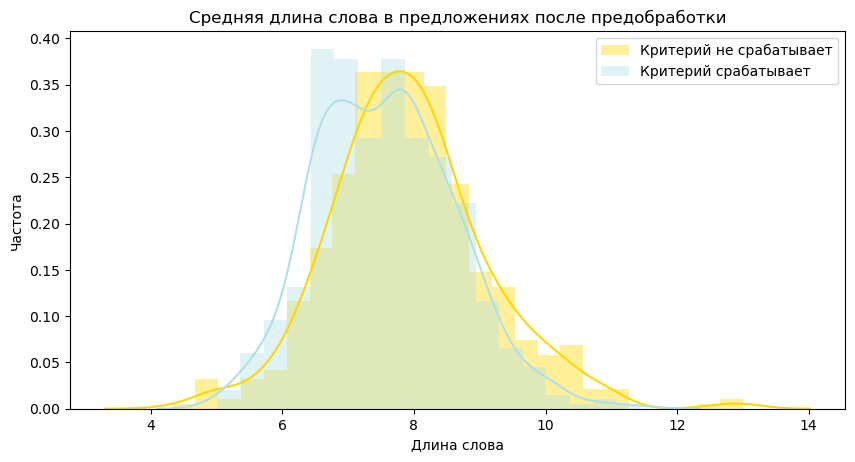

In [54]:
word0_=df[df['label'] == 0]['clean texts'].str.split().apply(lambda x : [len(i) for i in x])
word1_=df[df['label'] == 1]['clean texts'].str.split().apply(lambda x : [len(i) for i in x])

fig = plt.figure(figsize=(10,5),dpi=100)
sns.distplot(word0_.map(lambda x: np.mean(x)), color='gold', label='Критерий не срабатывает')
sns.distplot(word1_.map(lambda x: np.mean(x)), color='powderblue', label='Критерий срабатывает') 

plt.xlabel('Длина слова')
plt.ylabel('Частота')
plt.legend()
plt.title('Средняя длина слова в предложениях после предобработки')
plt.savefig('Средняя длина слова в предложениях после предобработки.png');

### Добавление биграмм

In [40]:
for i in range(len(clean_texts)):
    clean_texts[i].append(bigrams[i])

In [41]:
clean_texts

[['связь правило высокий стоимость имущество передаваемый длительный срок временной владение пользование арендатор условие обеспечительный платёж договор аренда включаться достаточно часто',
  'связь_правило правило_высокий высокий_стоимость стоимость_имущество имущество_передаваемый передаваемый_длительный длительный_срок срок_временной временной_владение владение_пользование пользование_арендатор арендатор_условие условие_обеспечительный обеспечительный_платёж платёж_договор договор_аренда аренда_включаться включаться_достаточно достаточно_часто'],
 ['быть правительство брать обязанность выплачивать стоимость квартира первоначальный взнос тело кредит участник оставаться платить процент',
  'быть_правительство правительство_брать брать_обязанность обязанность_выплачивать выплачивать_стоимость стоимость_квартира квартира_первоначальный первоначальный_взнос взнос_тело тело_кредит кредит_участник участник_оставаться оставаться_платить платить_процент'],
 ['затем потребоваться снять крупн

In [42]:
clean_texts = [[' '.join(i)] for i in clean_texts]
clean_texts  = [s[0] for s in clean_texts]

In [43]:
clean_df = df
clean_df['text']= clean_texts

In [44]:
clean_df

Unnamed: 0  label                                                url  \
0              0      0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1              1      0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2              2      0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3              3      0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4              4      1         https://ok.ru/ksfirst/topic/70000727225755   
...          ...    ...                                                ...   
1099        1099      0                   http://citylife-spb.ulcraft.com/   
1100        1100      1    https://ok.ru/avtolombards/topic/69818751358246   
1101        1101      0           http://etprf.ru/NotificationEX/id/109593   
1102        1102      0        http://customsforum.ru/citizens/auto-parts/   
1103        1103      1                   https://sl24leasing.ru/news/446/   

                                                   text  len in symbols  \
0     связь правило высокий стоимость имущество пере...             215   
1     быть правительство брать обязанность выплачива...             181   
2     затем потребоваться снять крупный сумма начать...             329   
3     каждый фирма рубрика услуга микрофинансировани...             128   
4     минимальный пакет документ минимальный_пакет п...              29   
...                                                 ...             ...   
1099  наш фирма лидер рынок свой область наш_фирма ф...              44   
1100  получение заём клиент должный предоставить мин...             147   
1101  поставка оборудование эквайринг предоставление...             555   
1102  случай непредставление соответствующий докумен...             342   
1103  особенность продуктовый предложение попасть де...             157   

      len in words  
0               28  
1               26  
2               49  
3               18  
4                3  
...            ...  
1099             9  
1100            17  
1101            63  
1102            34  
1103            18  

[1104 rows x 6 columns]

In [45]:
clean_df.to_csv('clean_min_docs.csv')

### Частотный анализ после предобработки 2

### Частота по всему тексту

In [46]:
from nltk.probability import FreqDist
fdist_clean = FreqDist(words)
fdist_clean

FreqDist({'паспорт': 400, 'документ': 248, 'заём': 205, 'который': 155, 'банк': 118, 'минимальный': 114, 'нужный': 114, 'день': 105, 'год': 100, 'деньга': 99, ...})

In [47]:
fdist_clean = pd.Series(dict(fdist_clean.most_common(30)))

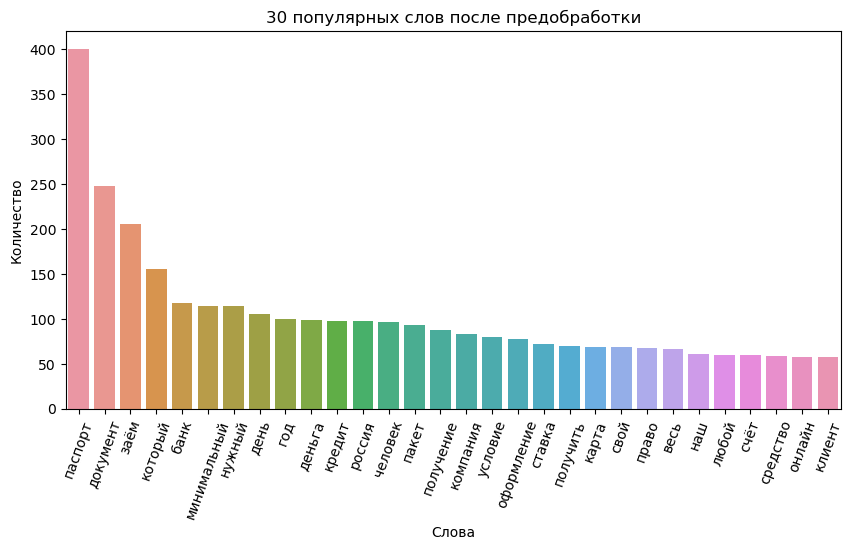

In [48]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
all_plot = sns.barplot(x=fdist_clean.index, y=fdist_clean.values, ax=ax)
plt.xticks(rotation=70);
plt.xlabel('Слова')
plt.ylabel('Количество')
plt.title('30 популярных слов после предобработки')
fig.savefig('Популярные слова после предобработки.png');

In [49]:
from wordcloud import WordCloud

In [50]:
text_raw = " ".join(words)

In [51]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2', stopwords =russian_stopwords ).generate(text_raw)

In [52]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

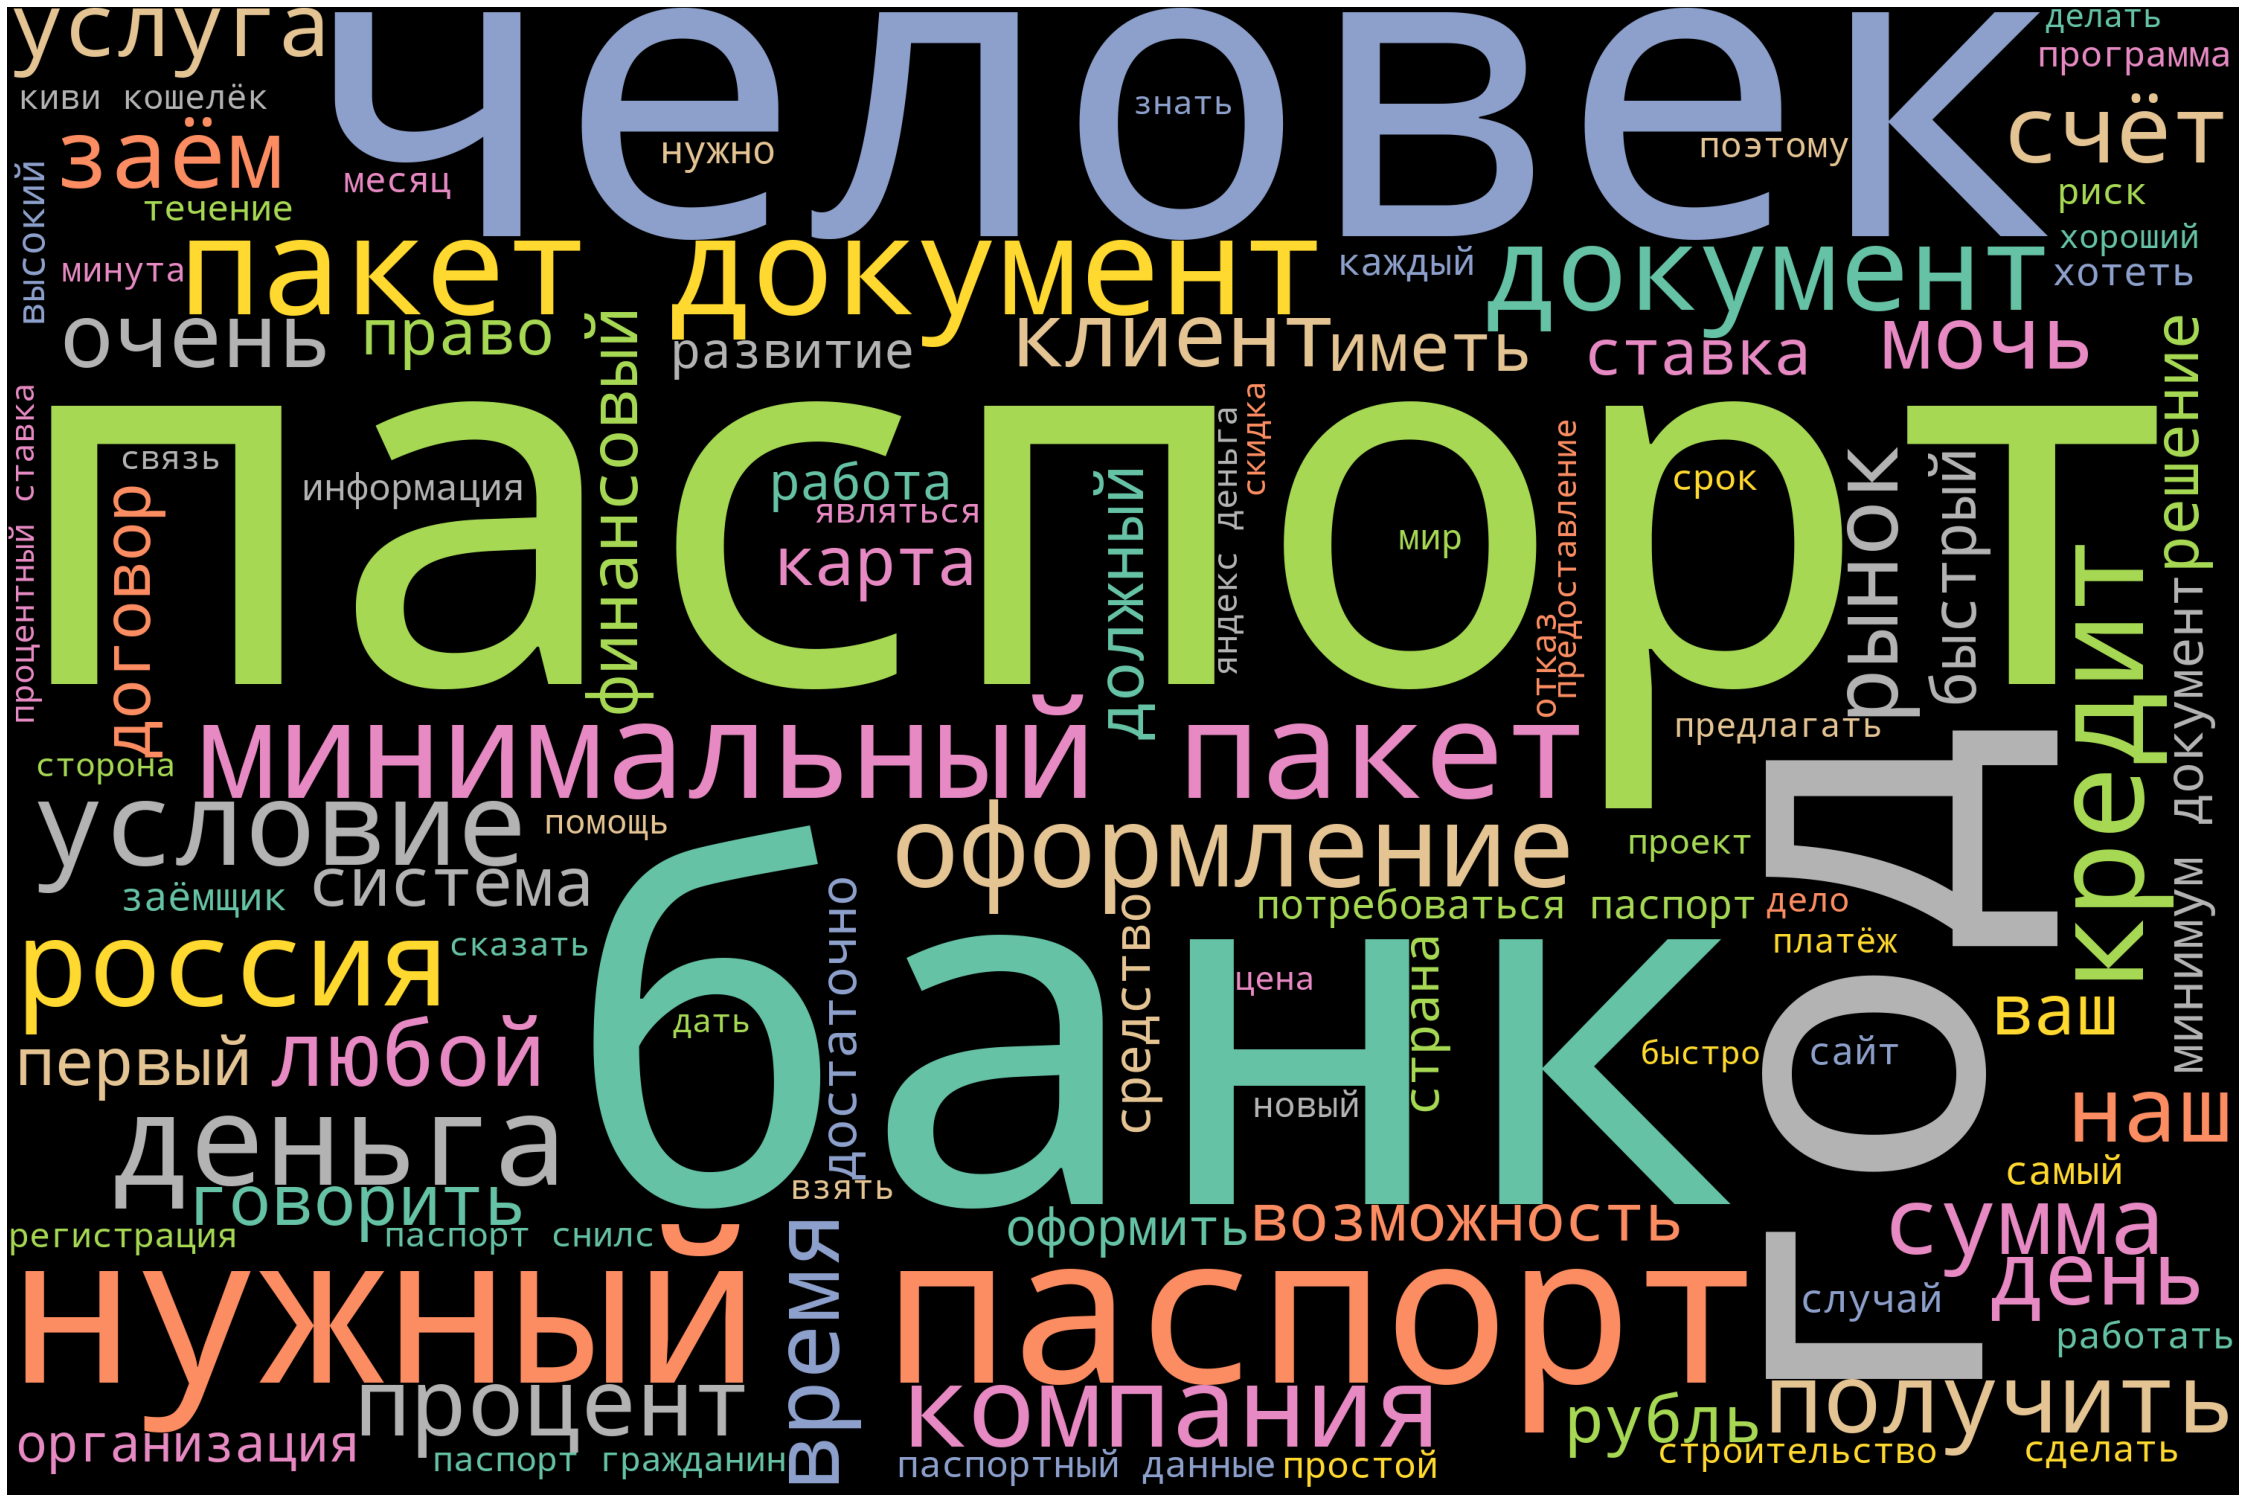

In [53]:
plot_cloud(wordcloud)
wordcloud.to_file("Популярные слова по всему тексту.png");

### Частота по категориям 

In [54]:
df = pd.read_csv('final_min_docs.csv')
df

Unnamed: 0  label                                                url  \
0              0      0  http://arbitrsamara.ru/dogovor-arendy/obespech...   
1              1      0  http://inlobnya.ru/novosti/obrazovanie/vospita...   
2              2      0  http://marslanov.com/otzyvy/audit-kompanii-22-...   
3              3      0  http://mail.mycompany.su/RU/dinskaya/company/m...   
4              4      1         https://ok.ru/ksfirst/topic/70000727225755   
...          ...    ...                                                ...   
1099        1099      0                   http://citylife-spb.ulcraft.com/   
1100        1100      1    https://ok.ru/avtolombards/topic/69818751358246   
1101        1101      0           http://etprf.ru/NotificationEX/id/109593   
1102        1102      0        http://customsforum.ru/citizens/auto-parts/   
1103        1103      1                   https://sl24leasing.ru/news/446/   

                                                   text  len in symbols  \
0     В связи с, как правило, высокой стоимостью иму...             215   
1     Ее суть в том, что Правительство берет на себя...             181   
2     затем мне потребовалось снять более крупную су...             329   
3     О каждой из 1103 фирм рубрики Услуги микрофина...             128   
4                         Минимальный пакет документов.              29   
...                                                 ...             ...   
1099       Наша фирма - лидер на рынке в своей области!              44   
1100  Для получения займа клиент должен предоставить...             147   
1101  "Поставка оборудования эквайринга с предоставл...             555   
1102  В случае непредставления соответствующих докум...             342   
1103  Особенности продуктового предложения Попади в ...             157   

      len in words  
0               28  
1               26  
2               49  
3               18  
4                3  
...            ...  
1099             9  
1100            17  
1101            63  
1102            34  
1103            18  

[1104 rows x 6 columns]

In [55]:
texts0 = df[df['label']==0]
texts1 = df[df['label']==1]

In [56]:
texts0 = texts0['text'].apply(lambda text: preprocessing(text))
texts1 = texts1['text'].apply(lambda text: preprocessing(text))

In [57]:
texts0 = preprocessing2(texts0)
texts1 = preprocessing2(texts1)

In [58]:
words_of_0 = []
for text in texts0:
    for word in text:
        words_of_0.append(word)
words_of_0 

['связь',
 'правило',
 'высокий',
 'стоимость',
 'имущество',
 'передаваемый',
 'длительный',
 'срок',
 'временной',
 'владение',
 'пользование',
 'арендатор',
 'условие',
 'обеспечительный',
 'платёж',
 'договор',
 'аренда',
 'включаться',
 'достаточно',
 'часто',
 'быть',
 'правительство',
 'брать',
 'обязанность',
 'выплачивать',
 'стоимость',
 'квартира',
 'первоначальный',
 'взнос',
 'тело',
 'кредит',
 'участник',
 'оставаться',
 'платить',
 'процент',
 'затем',
 'потребоваться',
 'снять',
 'крупный',
 'сумма',
 'начаться',
 'просадка',
 'система',
 'позволять',
 'просадка',
 'выйти',
 'рассылка',
 'весь',
 'почта',
 'миновать',
 'кризис',
 'просьба',
 'август',
 'месяц',
 'выводить',
 'средство',
 'сила',
 'банкипартнёр',
 'поддерживать',
 'средство',
 'инвестор',
 'пострадать',
 'нужно',
 'время',
 'заработать',
 'каждый',
 'фирма',
 'рубрика',
 'услуга',
 'микрофинансирование',
 'получить',
 'подробный',
 'контакт',
 'адрес',
 'красный',
 'телефон',
 'территориальный',
 'избир

In [59]:
words_of_1 = []
for text in texts1:
    for word in text:
        words_of_1.append(word)
words_of_1

['минимальный',
 'пакет',
 'документ',
 'обращаться',
 'год',
 'нужный',
 'паспорт',
 'человек',
 'состоять',
 'движение',
 'паспорт',
 'волонтёр',
 'хотеть',
 'делать',
 'полезный',
 'дело',
 'собирать',
 'куча',
 'бумажка',
 'достаточно',
 'паспорт',
 'свидетельство',
 'право',
 'собственность',
 'недвижимость',
 'понадобиться',
 'паспорт',
 'выписка',
 'егрн',
 'свидетельство',
 'документоснование',
 'версия',
 'сопровождаться',
 'развиваться',
 'конец',
 'год',
 'мочь',
 'использовать',
 'способ',
 'паспорт',
 'фотография',
 'оформить',
 'онлайн',
 'заём',
 'карта',
 'паспорт',
 'нужный',
 'паспорт',
 'срочнокредить',
 'займонлайн',
 'займыдлястудент',
 'подача',
 'заявка',
 'оформление',
 'кредит',
 'клиент',
 'категория',
 'нужно',
 'иметь',
 'паспорт',
 'срок',
 'рассмотрение',
 'заявка',
 'сутки',
 'вход',
 'мероприятие',
 'осуществляться',
 'наличие',
 'паспорт',
 'билет',
 'оформление',
 'требоваться',
 'паспорт',
 'рф',
 'второй',
 'документ',
 'снилс',
 'инна',
 'право',
 '

In [60]:
fdist0 = FreqDist(words_of_0)
fdist1 = FreqDist(words_of_1)

In [61]:
fdist0.most_common(10)

[('который', 134),
 ('человек', 87),
 ('банк', 78),
 ('компания', 72),
 ('год', 71),
 ('условие', 67),
 ('россия', 65),
 ('свой', 57),
 ('рынок', 55),
 ('наш', 49)]

In [62]:
fdist1.most_common(10)

[('паспорт', 398),
 ('документ', 227),
 ('заём', 170),
 ('минимальный', 104),
 ('нужный', 104),
 ('пакет', 90),
 ('оформление', 71),
 ('получение', 70),
 ('кредит', 64),
 ('карта', 59)]

In [63]:
text_raw0 = " ".join(words_of_0)
text_raw1 = " ".join(words_of_1)
wordcloud0 = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2', stopwords =russian_stopwords ).generate(text_raw0)
wordcloud1 = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2', stopwords =russian_stopwords ).generate(text_raw1)

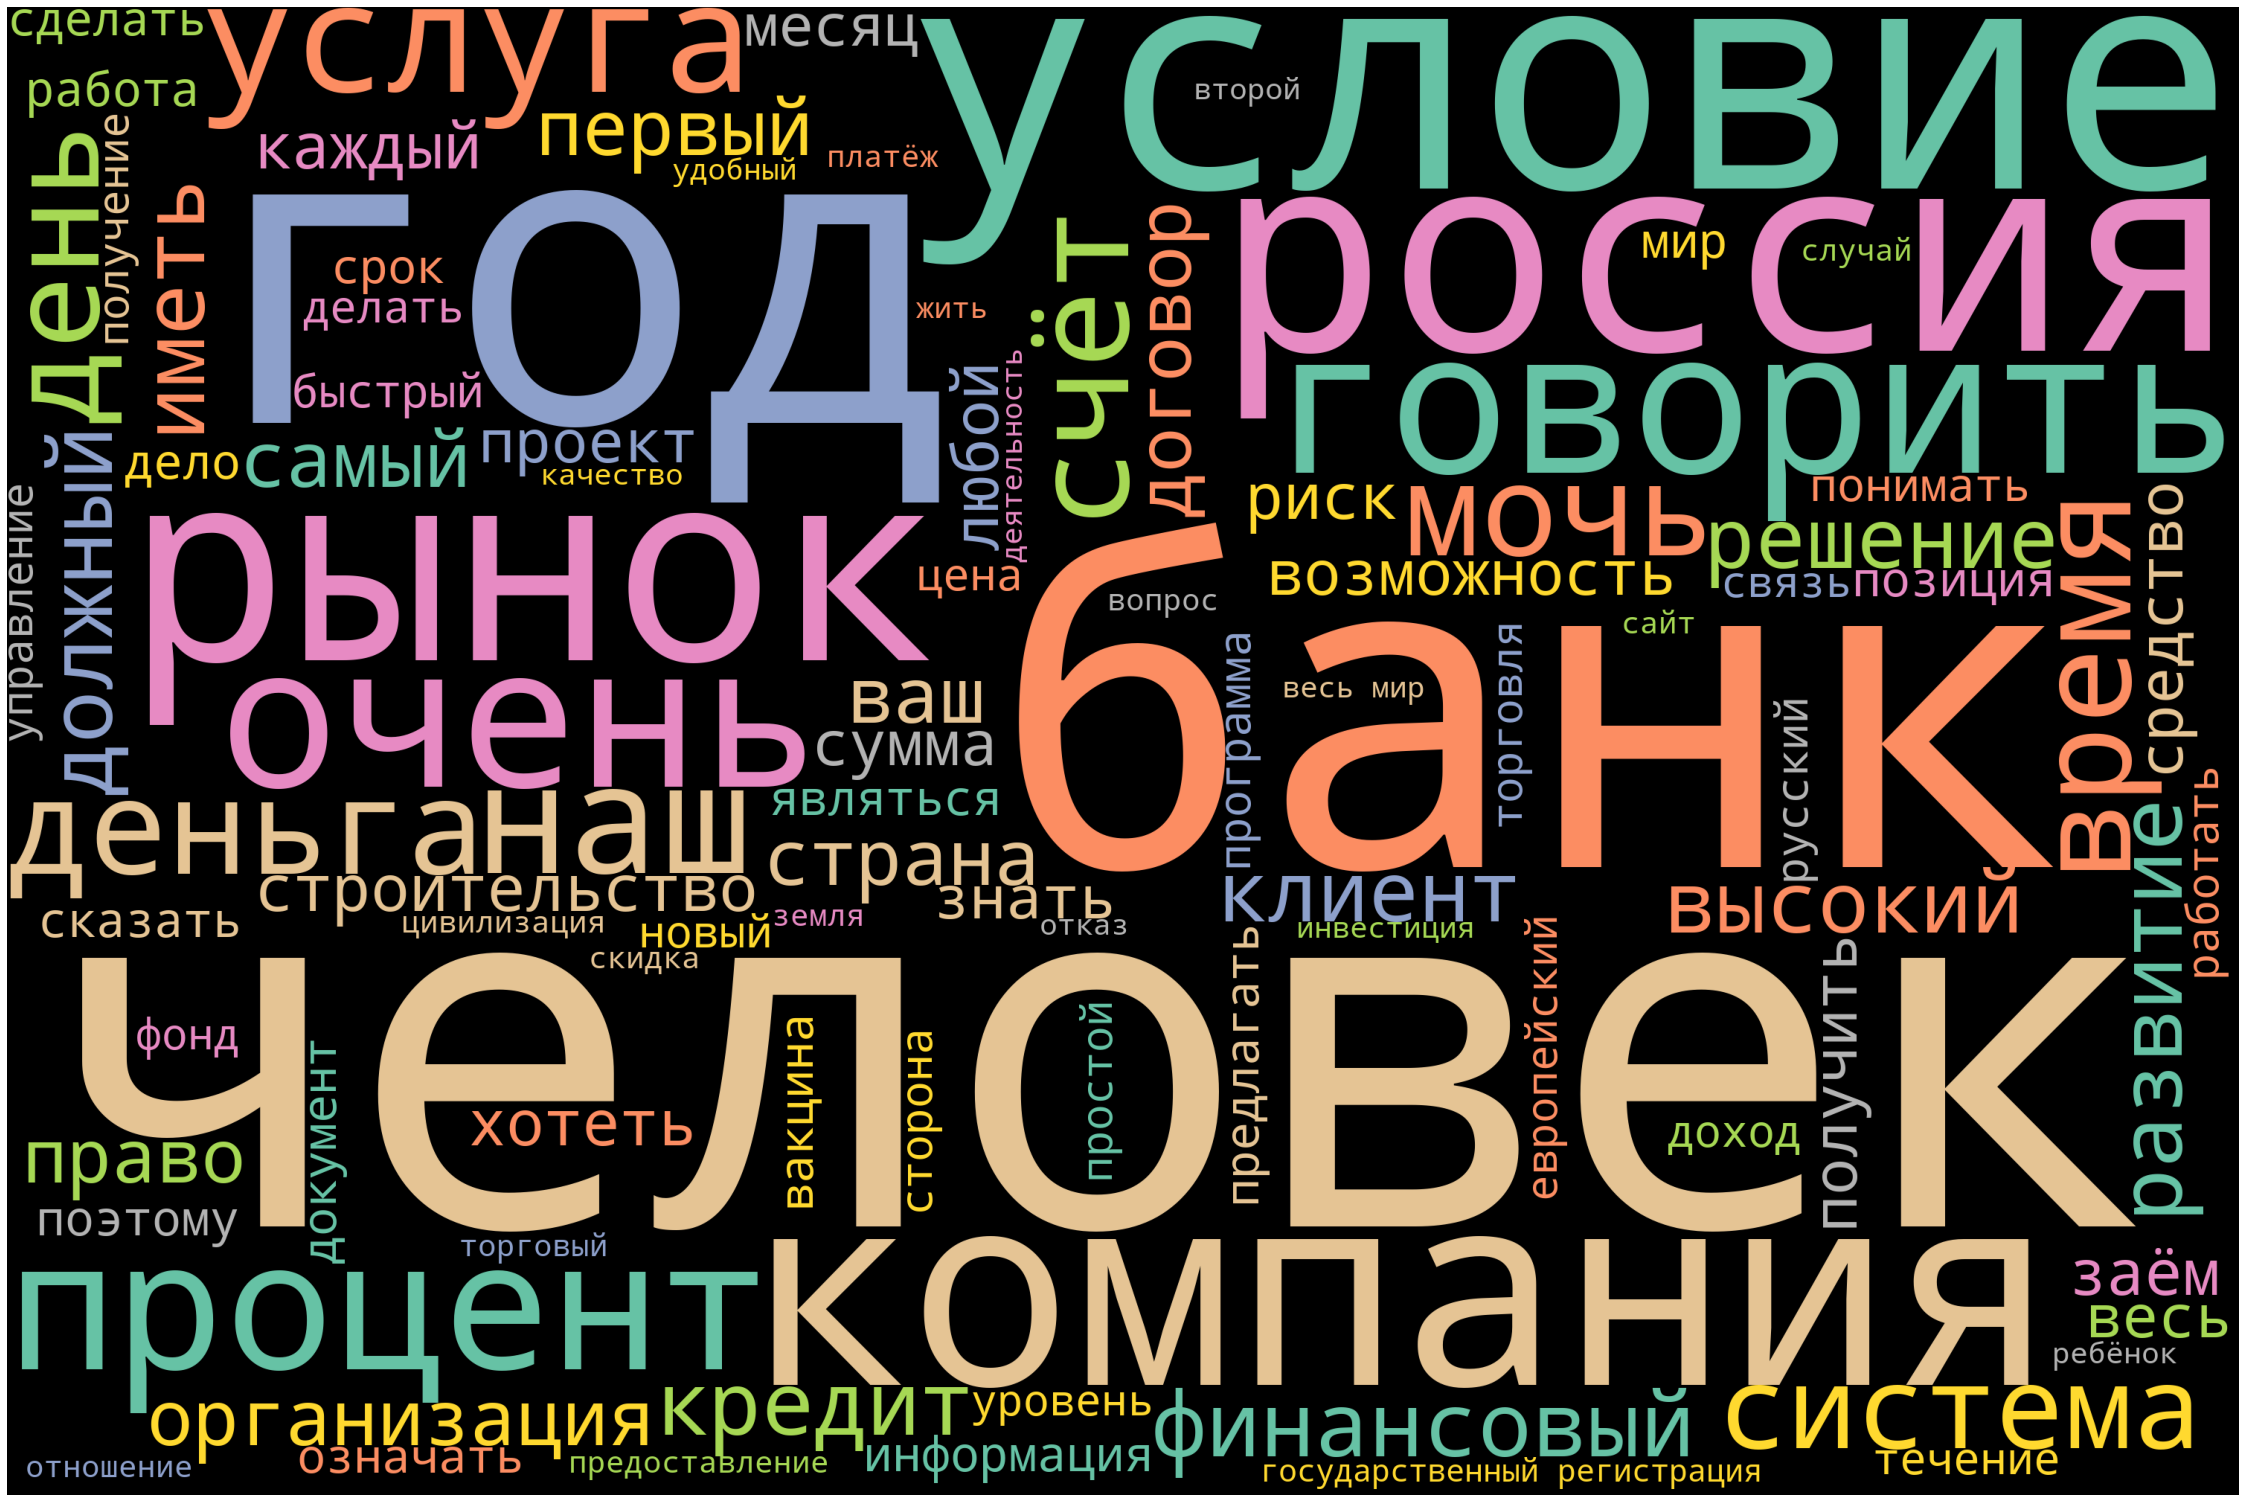

In [64]:
plot_cloud(wordcloud0)
wordcloud0.to_file("Популярные слова по категории, где критерий не срабатывает.png");

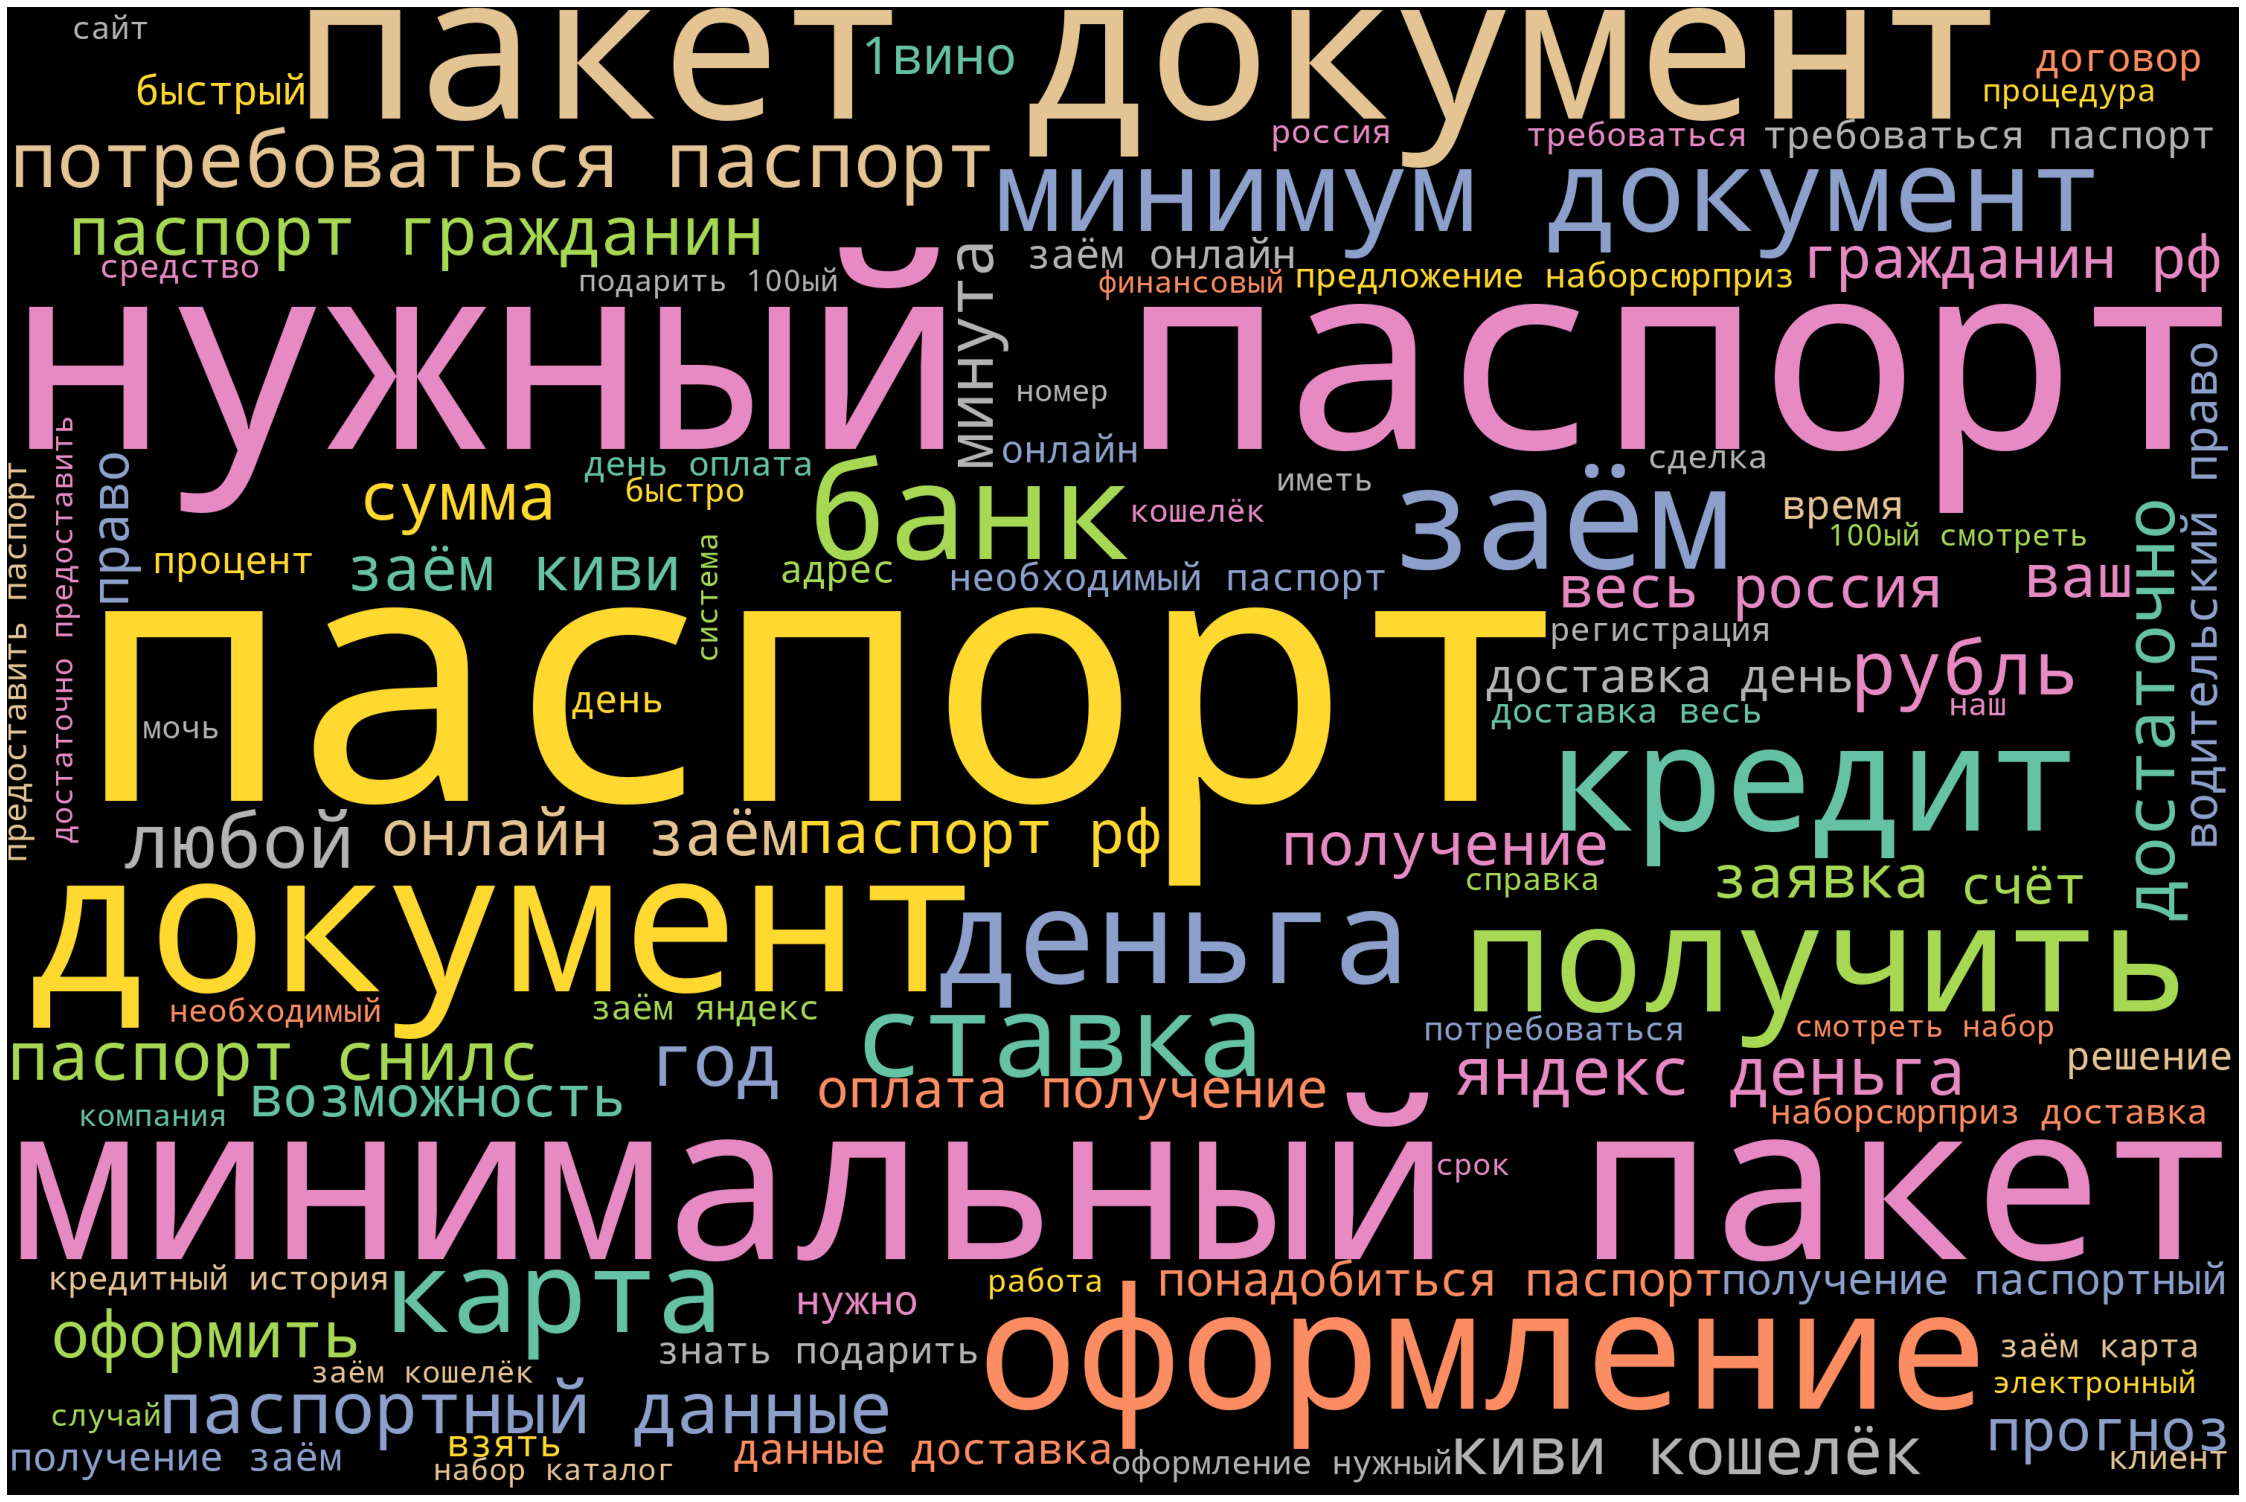

In [65]:
plot_cloud(wordcloud1)
wordcloud1.to_file("Популярные слова по категории, где критерий срабатывает.png");

In [66]:
cnt0 = Counter()
cnt1 = Counter()

In [67]:
for word in words_of_0:
    cnt0[word] += 1

for word in words_of_1:
    cnt1[word] += 1

In [68]:
u0 = list(set(cnt0) - set(cnt1))
unique_for_0 = {}
for i in u0:
    unique_for_0[i] = cnt0.get(i)

In [69]:
sorted_dict_0 = {}
sorted_keys0 = sorted(unique_for_0, key=unique_for_0.get, reverse = True)  

for w in sorted_keys0:
    sorted_dict_0[w] = unique_for_0[w]

sorted_dict_0

{'высокий': 41,
 'позиция': 34,
 'развитие': 33,
 'строительство': 26,
 'уровень': 23,
 'русский': 22,
 'европейский': 22,
 'земля': 22,
 'означать': 21,
 'вакцина': 21,
 'понимать': 20,
 'вариант': 19,
 'русь': 18,
 'торговля': 18,
 'век': 18,
 'торговый': 17,
 'путь': 17,
 'цивилизация': 17,
 'жить': 16,
 'ордер': 15,
 'устойчивый': 15,
 'народ': 15,
 'открытый': 15,
 'медицинский': 15,
 'современный': 15,
 'сша': 15,
 'бизнес': 14,
 'страхование': 14,
 'принять': 14,
 'изменение': 14,
 'европа': 14,
 'начинать': 13,
 'общество': 13,
 'форекс': 13,
 'запад': 12,
 'язык': 12,
 'революция': 12,
 'миллиард': 12,
 'культура': 12,
 'обеспечить': 12,
 'точка': 11,
 'трейдер': 11,
 'результат': 11,
 'вооружённый': 11,
 'партнёрский': 11,
 'америка': 11,
 'западный': 11,
 'жизнь': 11,
 'ооо': 11,
 'инвестор': 11,
 'партнёр': 10,
 'совершенно': 10,
 'профессиональный': 10,
 'семья': 10,
 'книга': 10,
 'сеть': 10,
 'труд': 10,
 'слишком': 10,
 'соответствие': 10,
 'активно': 10,
 'курс': 10,
 

In [70]:
u1 = list(set(cnt1) - set(cnt0))
unique_for_1 = {}
for i in u1:
    unique_for_1[i] = cnt1.get(i)

In [71]:
sorted_dict_1 = {}
sorted_keys1 = sorted(unique_for_1, key=unique_for_1.get, reverse = True)  

for w in sorted_keys1:
    sorted_dict_1[w] = unique_for_1[w]

sorted_dict_1

{'кошелёк': 52,
 'киви': 38,
 'снилс': 37,
 'паспортный': 36,
 'доставка': 35,
 'водительский': 25,
 'понадобиться': 22,
 '1вино': 17,
 'подарить': 14,
 'наборсюрприз': 14,
 '100ый': 11,
 'футбол': 11,
 'страховка': 10,
 'билет': 9,
 'рассрочка': 9,
 'букмекерский': 8,
 'одобрение': 8,
 'контора': 8,
 'выдавать': 7,
 'челси': 7,
 'мобильный': 7,
 'любимый': 7,
 'предъявить': 6,
 'реал': 6,
 'распродажа': 6,
 'брага': 6,
 'экспресс': 6,
 'порт': 6,
 'подать': 6,
 'мадрид': 6,
 'барселона': 6,
 'мгновенно': 6,
 'брайтон': 6,
 'валенсия': 6,
 '14февраль': 6,
 'кристал': 6,
 'млн': 6,
 'фотография': 6,
 'скачать': 6,
 'вильярреал': 6,
 'тоттенхэма': 6,
 'пэласа': 6,
 'стс': 5,
 'букмекер': 5,
 'кейс': 5,
 'купить': 5,
 'категория': 5,
 'анкета': 5,
 'упрощённый': 5,
 'посещение': 4,
 'меховой': 4,
 'новичок': 4,
 'заказать': 4,
 'предоплата': 4,
 'заработок': 4,
 'мтс': 4,
 'улсоветский': 4,
 'пбезенчук': 4,
 'магпятёрочка': 4,
 'ип': 4,
 'шуба': 4,
 'предъявление': 4,
 'пуховик': 4,
 'пос

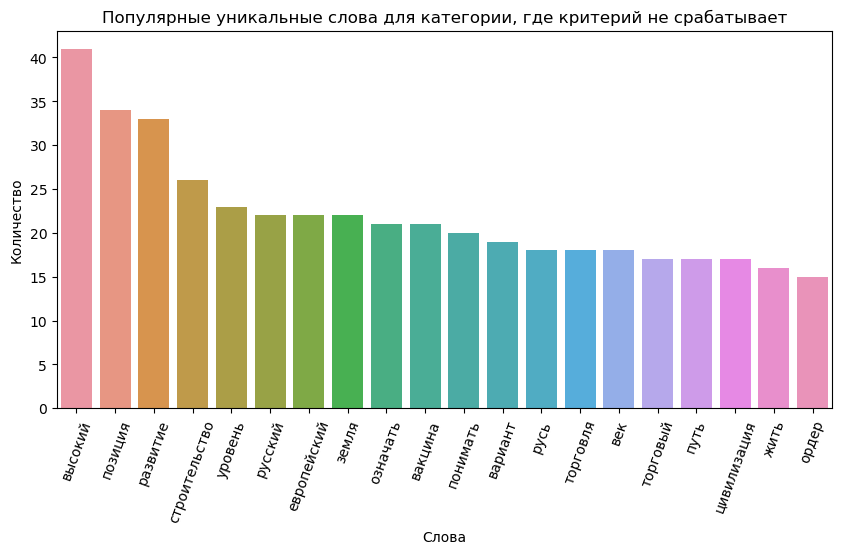

In [89]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
keys_0 = [list(sorted_dict_0.keys())[i] for i in range(20)]
val_0 = [list(sorted_dict_0.values())[i] for i in range(20)]
all_plot = sns.barplot(x=keys_0, y=val_0, ax=ax)
plt.xticks(rotation=70);
plt.xlabel('Слова')
plt.ylabel('Количество')
plt.title('Популярные уникальные слова для категории, где критерий не срабатывает')
fig.savefig('Популярные уникальные слова для категории, где критерий не срабатывает.png');

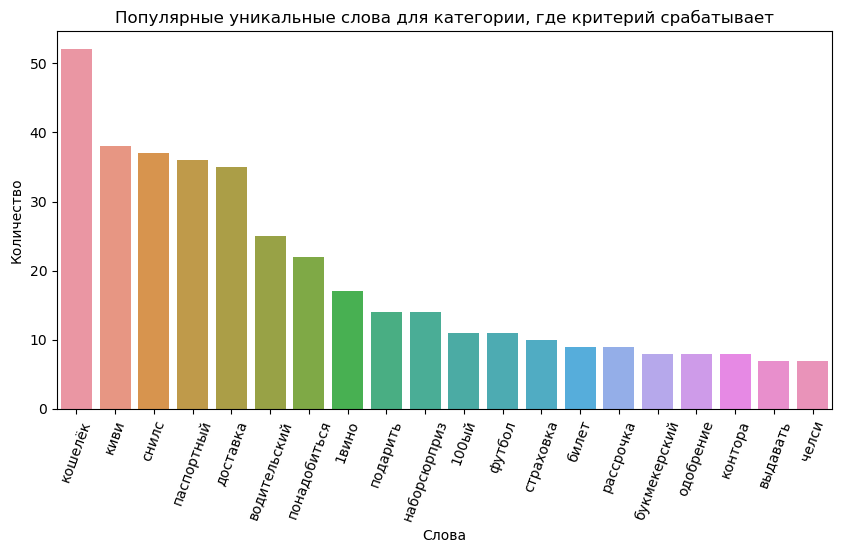

In [90]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
keys_1 = [list(sorted_dict_1.keys())[i] for i in range(20)]
val_1 = [list(sorted_dict_1.values())[i] for i in range(20)]
all_plot = sns.barplot(x=keys_1, y=val_1, ax=ax)
plt.xticks(rotation=70);
plt.xlabel('Слова')
plt.ylabel('Количество')
plt.title('Популярные уникальные слова для категории, где критерий срабатывает')
fig.savefig('Популярные уникальные слова для категории, где критерий срабатывает.png');